<a href="https://colab.research.google.com/github/winnie-wildin/CLTV-prediction-model/blob/main/CalculatingCLTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import modules
import pandas as pd # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt
import numpy as np

Loading Dataset

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/practice/Online Retail.xlsx")

In [ ]:
data.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom


Removing duplcates by keeping only unique customer ids and country

In [ ]:
filtered_data=data[['Country','CustomerID']].drop_duplicates()

In [ ]:
filtered_data.head(100)

,Country,CustomerID
0,United Kingdom,17850.0
9,United Kingdom,13047.0
26,France,12583.0
46,United Kingdom,13748.0
65,United Kingdom,15100.0
...,...,...
3053,United Kingdom,16835.0
3058,United Kingdom,15235.0
3063,United Kingdom,13576.0
3080,United Kingdom,18011.0


PLOTTING TOP TEN COUNTRIES

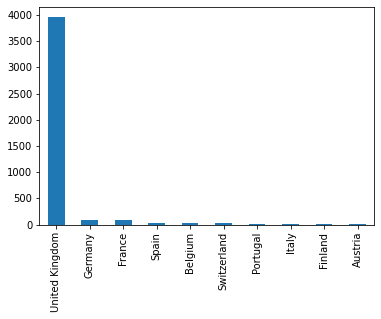

In [ ]:
filtered_data.Country.value_counts()[:10].plot(kind='bar')

Now we single out UK's data

In [ ]:
uk_data=data[data.Country=='United Kingdom']
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    495478 non-null  object        
 1   StockCode    495478 non-null  object        
 2   Description  494024 non-null  object        
 3   Quantity     495478 non-null  int64         
 4   InvoiceDate  495478 non-null  datetime64[ns]
 5   UnitPrice    495478 non-null  float64       
 6   CustomerID   361878 non-null  float64       
 7   Country      495478 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.0+ MB


summary statistics.

In [ ]:
uk_data.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,361878.000000
mean,8.605486,4.532422,15547.871368
std,227.588756,99.315438,1594.402590
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14194.000000
50%,3.000000,2.100000,15514.000000
75%,10.000000,4.130000,16931.000000
max,80995.000000,38970.000000,18287.000000


Removed negative quantities

In [ ]:
uk_data = uk_data[(uk_data['Quantity']>0)]
uk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486286 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    486286 non-null  object        
 1   StockCode    486286 non-null  object        
 2   Description  485694 non-null  object        
 3   Quantity     486286 non-null  int64         
 4   InvoiceDate  486286 non-null  datetime64[ns]
 5   UnitPrice    486286 non-null  float64       
 6   CustomerID   354345 non-null  float64       
 7   Country      486286 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.4+ MB


## FILTER REQUIRED COLUMNS

You only need her five columns CustomerID, InvoiceDate, InvoiceNo, Quantity, and UnitPrice.



1.**CustomerID** will uniquely define your customers.

2.**InvoiceDate** help you calculate numbers of days customer stayed with your product.

3.**InvoiceNo** helps you to count the number of time transaction performed(frequency).

4.**Quantity** is purchased item units in each transaction.

5.**UnitPrice** of each unit purchased by the customer will help you to calculate the total purchased amount.









 *The warning message is indicating that a value is being set on a copy of a slice of a DataFrame, rather than on the original DataFrame itself. This can cause unexpected behavior and lead to confusion.

To avoid this warning, it is recommended to use the .loc indexer to set the value, which ensures that the operation is performed on the original DataFrame. For example, instead of using uk_data['TotalPurchase'] = uk_data['Quantity']*uk_data['UnitPrice'], you would use uk_data.loc[:, 'TotalPurchase'] = uk_data['Quantity']*uk_data['UnitPrice'].*

In [ ]:
uk_data=uk_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]

#Calulate total purchase
uk_data.loc[:, 'TotalPurchase'] = uk_data['Quantity']*uk_data['UnitPrice']

uk_data.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


In [ ]:
uk_data_group=uk_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days, 
                                                 'InvoiceNo': lambda num: len(num),
                                                 'Quantity': lambda quant: quant.sum(),
                                                 'TotalPurchase': lambda price: price.sum()})

uk_data_group.head()

,InvoiceDate,InvoiceNo,Quantity,TotalPurchase
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


# RENAME COLUMNS

In [ ]:
uk_data_group.columns=['num_days','num_transactions','num_units','spent_money']
uk_data_group.head()

,num_days,num_transactions,num_units,spent_money
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


# Reindexed coulmns

In [ ]:
uk_data_group = uk_data_group.reindex(columns=['num_transactions', 'num_days', 'num_units', 'spent_money'])
uk_data_group.head()

,num_transactions,num_days,num_units,spent_money
CustomerID,,,,
12346.0,1,0,74215,77183.60
12747.0,103,366,1275,4196.01
12748.0,4596,372,25748,33719.73
12749.0,199,209,1471,4090.88
12820.0,59,323,722,942.34


In [ ]:
uk_data_group.shape[0]

3921

# Calculate CLTV using the following formula:
CLTV = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin.

**Customer Value = Average Order Value * Purchase Frequency ***

1. Calculate Average Order Value

In [ ]:
# Average Order Value
uk_data_group['avg_order_value']=uk_data_group['spent_money']/uk_data_group['num_transactions']

uk_data_group.head()

,num_transactions,num_days,num_units,spent_money,avg_order_value
CustomerID,,,,,
12346.0,1,0,74215,77183.60,77183.600000
12747.0,103,366,1275,4196.01,40.737961
12748.0,4596,372,25748,33719.73,7.336756
12749.0,199,209,1471,4090.88,20.557186
12820.0,59,323,722,942.34,15.971864


2. Calculate Purchase Frequency

In [ ]:
purchase_frequency=sum(uk_data_group['num_transactions'])/uk_data_group.shape[0]
print(purchase_frequency)

90.37107880642694


3. Calculate Repeat Rate and Churn Rate

In [ ]:
# Repeat Rate
repeat_rate=uk_data_group[uk_data_group.num_transactions > 1].shape[0]/uk_data_group.shape[0]

#Churn Rate
churn_rate=1-repeat_rate

purchase_frequency, repeat_rate, churn_rate

(90.37107880642694, 0.9818923743942872, 0.018107625605712774)

4. Calculate Profit Margin

Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. Let’s assume our business has approx 5% profit on the total sale.

In [ ]:
#Profit Margin
uk_data_group['profit_margin']=uk_data_group['spent_money']*0.05

uk_data_group.head()

,num_transactions,num_days,num_units,spent_money,avg_order_value,profit_margin
CustomerID,,,,,,
12346.0,1,0,74215,77183.60,77183.600000,3859.1800
12747.0,103,366,1275,4196.01,40.737961,209.8005
12748.0,4596,372,25748,33719.73,7.336756,1685.9865
12749.0,199,209,1471,4090.88,20.557186,204.5440
12820.0,59,323,722,942.34,15.971864,47.1170


5. Calculate Customer Lifetime Value

In [ ]:
# Customer Value
uk_data_group['CV']=(uk_data_group['avg_order_value']* purchase_frequency) / churn_rate

#Customer Lifetime Value
uk_data_group['cust_lifetime_value']=uk_data_group['CV']*uk_data_group['profit_margin']

uk_data_group.head()

,num_transactions,num_days,num_units,spent_money,avg_order_value,profit_margin,CV,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,1,0,74215,77183.60,77183.600000,3859.1800,3.852060e+08,1.486579e+12
12747.0,103,366,1275,4196.01,40.737961,209.8005,2.033140e+05,4.265538e+07
12748.0,4596,372,25748,33719.73,7.336756,1685.9865,3.661610e+04,6.173424e+07
12749.0,199,209,1471,4090.88,20.557186,204.5440,1.025963e+05,2.098545e+07
12820.0,59,323,722,942.34,15.971864,47.1170,7.971198e+04,3.755789e+06


Prediction Model for CLTV
Let’s build the CLTV prediction model. Here, you are going to predict CLTV using Linear Regression Model. Let’s first use the data loaded and filtered above.

In [ ]:
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34


Extract month and year from InvoiceDate.

In [ ]:
uk_data['month_yr'] = uk_data['InvoiceDate'].apply(lambda x: x.strftime('%b-%Y'))
uk_data.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPurchase,month_yr
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30,Dec-2010
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00,Dec-2010
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34,Dec-2010


The pivot table takes the columns as input, and groups the entries into a two-dimensional table in such a way that provides a multidimensional summarization of the data.

In [ ]:
sale=uk_data.pivot_table(index=['CustomerID'],columns=['month_yr'],values='TotalPurchase',aggfunc='sum',fill_value=0).reset_index()
sale.head()


month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00
2,12748.0,1100.37,898.24,4228.13,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,10639.23,2292.84,6148.84
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77


Let’s sum all the month’s sales.

In [ ]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)
sale.head()

month_yr,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.00,0.00,0.00,0.00,0.00,77183.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,77183.60
1,12747.0,0.00,301.70,706.27,438.50,0.00,303.04,0.00,376.30,310.78,771.31,312.73,675.38,0.00,4196.01
2,12748.0,1100.37,898.24,4228.13,1070.27,389.64,418.77,1113.27,2006.26,1179.37,2234.50,10639.23,2292.84,6148.84,32619.36
3,12749.0,0.00,1896.13,0.00,763.06,0.00,0.00,0.00,0.00,0.00,859.10,572.59,0.00,0.00,4090.88
4,12820.0,0.00,0.00,0.00,210.35,0.00,170.46,0.00,0.00,0.00,0.00,0.00,343.76,217.77,942.34


Selecting Feature
Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables). Select the latest 6 months as an independent variable.

In [ ]:
X=sale[['Dec-2011','Nov-2011', 'Oct-2011','Sep-2011','Aug-2011','Jul-2011']]
y=sale[['CLV']]

Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let’s split dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size. Additionally, you can use random_state as a seed value to maintain reproducibility, which means whenever you split the data will not affect the results. Also, if random_state is None, then the random number generator uses np.random for selecting records randomly. It means If you don’t set seed, it is different each time.


In [ ]:
#split training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [ ]:
# import model
from sklearn.linear_model import LinearRegression# instantiate
linreg = LinearRegression()# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)# make predictions on the testing set
y_pred = linreg.predict(X_test)# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

[208.50969617]
[[0.99880551 0.80381254 1.60226829 1.67433228 1.52860813 2.87959449]]


How Well Does the Model Fit the data?
In order to evaluate the overall fit of the linear model, we use the R-squared value. R-squared is the proportion of variance explained by the model. Value of R-squared lies between 0 and 1. A higher value of R-squared is considered better because it indicates the larger variance explained by the model.

In [ ]:
from sklearn import metrics# compute the R Square for model
print("R-Square:",metrics.r2_score(y_test, y_pred))

R-Square: 0.9666074402817512


Model Evaluation
For regression problems following evaluation metrics were used (Ritchie Ng):

Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
Mean Squared Error (MSE) is the mean of the squared errors.
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [ ]:
# calculate MAE using scikit-learn
print("MAE:",metrics.mean_absolute_error(y_test,y_pred))#calculate mean squared error
print("MSE",metrics.mean_squared_error(y_test, y_pred))
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 595.028228470123
MSE 2114139.8898678925
RMSE: 1454.0082151995884
